<a href="https://colab.research.google.com/github/guillermohenrion/Intro-Python/blob/master/DT_scikit_learn_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Ejemplo completo de árbol de decisión con [scikit-learn](https://scikit-learn.org/stable/)

## Importación de las librería necesarias

* sklearn: https://scikit-learn.org/stable/ Machine Learning in Python
* pandas: https://pandas.pydata.org/ Python Data Analysis Library
* pydotplus: https://pypi.org/project/pydotplus/ Python Interface to Graphviz’s Dot language
    Se debe instalar https://www.graphviz.org/ y actualizar Anaconda
* matplotlib: https://matplotlib.org/  Python 2D plotting library


In [1]:
import sklearn.datasets as datasets
import pandas as pd
import random
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import confusion_matrix
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
from google.colab import files
uploaded=files.upload()

Saving ws.csv to ws (1).csv


## Leer archivo csv (Play Tennis)

Recorre todas las filas del archivo csvfile y lo deja en lista a, en donde cada fila es una lista 

In [0]:
a = pd.read_csv('ws.csv')


## Define los valores posibles de los atributos

Son 4 variables categóricas y la longitud del input es 14

In [31]:
attributes = [['sunny','rain','overcast'],
              ['cool','mild','hot'],
              ['normal','high'],
              ['strong','weak'],
              ['yes', 'no']]
print(len(a))
num_attributes = len(attributes)
print(num_attributes)


14
5


## Transforma los valores categóricos a numéricas

Se utiliza para eso LabelEncoder, declarando un encoder para cada variable categórica, pudiendo en cualquier momento
recuperar el valor originalde cada una.
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
Por ejemplo el valor sunny se codifica con un 2

In [32]:
#Se debe poder hacer más sencillo
c=[]
cj=[]
y=[]
le1 = preprocessing.LabelEncoder()
le2 = preprocessing.LabelEncoder()
le3 = preprocessing.LabelEncoder()
le4 = preprocessing.LabelEncoder()
le5 = preprocessing.LabelEncoder()
le1.fit(attributes[0])
le2.fit(attributes[1])
le3.fit(attributes[2])
le4.fit(attributes[3])
le5.fit(attributes[4])

for i in range(0,len(a)):
    y.append(a['PlayTennis'][i:i+1])
    c1=le1.transform(a['Outlook'][i:i+1])
    c2=le2.transform(a['Temperature'][i:i+1])
    c3=le3.transform(a['Humidity'][i:i+1])
    c4=le4.transform(a['Wind'][i:i+1])
    c5=le5.transform(a['PlayTennis'][i:i+1])
    c.append([c1[0],c2[0], c3[0], c4[0], c5[0]])
df=pd.DataFrame(c, columns=a.columns)
df.head()


,Outlook,Temperature,Humidity,Wind,PlayTennis
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1


En c queda la lista transformda, que se convierte a un data frame de pandas para utilizar como input
de train_test_split

Se particiona en train y test (train_X tiene los valores de los atributos y train_y los valores de las respuestas 
correspondientes, lo mismo para test)
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [0]:
train_X, test_X, train_y, test_y = train_test_split(df[['Outlook', 'Temperature', 'Humidity','Wind']], df['PlayTennis'], 
                                                    train_size=0.7,
                                                    test_size=0.3,
                                                    random_state=123)


Se construye el modelo utilziando DecisionTreeClassifier
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
y con fit se ajusta este modelo al conjunto de entrenamiento (atributos y respuestas)
Se muestran los parámetros por defecto, pero se pueden modificar cualquiera de ellos como se muestra con max_leaf_nodes=10

In [34]:
dtree=DecisionTreeClassifier(max_depth=3, min_samples_split=3)
dtree.fit(train_X, train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Con prediction calculo mi modelo con el conjunto de test de manera de medir qué el comportamkiento sonbre este conjunto

In [0]:
predictions=dtree.predict(test_X)

Y posteriormente con accuracy veo la bondad de ajuste sobre el test
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

In [36]:
acc=accuracy_score(test_y, predictions)
acc

0.4

Lo mismo para la matriz de confusón
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [37]:
confusion_matrix(test_y, predictions)


array([[1, 2],
       [1, 1]])

Se grafica el árbol con graphviz

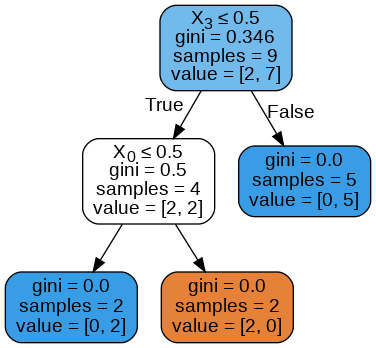

In [38]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Por útltimo se arma la curva ROC

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html

Para eso se trasnforma primero tanto 'y' como la salida del modelos con el mismo encoder a valores numéricos y luego se ejecuta roc_curve que deuelve los valores para fpry tpr con los cuales peude ser graficada la curva.

In [39]:
auc=roc_auc_score(test_y, predictions)

fpr, tpr, thresholds = roc_curve(test_y, predictions)

print(thresholds)
print(fpr)
print(tpr)

[2 1 0]
[0.         0.66666667 1.        ]
[0.  0.5 1. ]


Gráfico de la ROC anterior

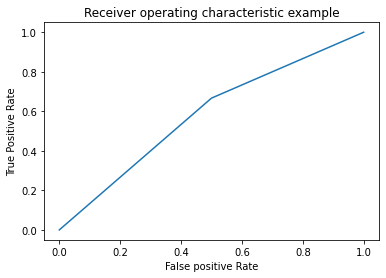

In [40]:
plt.plot(tpr, fpr)
plt.xlabel('False positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.show()

# ANEXOS

## Usa cross validation y obtiene el accuracy promedio 
https://scikit-learn.org/stable/modules/cross_validation.html


In [41]:
from sklearn.model_selection import cross_val_score

clf=DecisionTreeClassifier(max_leaf_nodes=10)
scores = cross_val_score(clf, df[['Outlook', 'Temperature', 'Humidity','Wind']], df['PlayTennis'], cv=5, scoring='roc_auc')
scores.mean()

0.9

## Obtiene utilizando optimización basada en búsqueda exhaustiva sobre los hiperparámetros de manera de devolver los que mejor se ajustan

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

En este caso evalúa el parámetros max_depth desde 3 a 20

In [42]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':range(3,20)}
clf = GridSearchCV(DecisionTreeClassifier(), parameters, n_jobs=10, scoring='accuracy')
clf.fit(X=df[['Outlook', 'Temperature', 'Humidity','Wind']], y=df['PlayTennis'])
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_)


0.8666666666666666 {'max_depth': 4}


## Imputa valores nulos

En el ejemplo se pone un valor nulo NaN, y se imputa con el más frecuente

In [43]:
from sklearn import preprocessing
import numpy as np
from sklearn.impute import SimpleImputer
c[2][2]=np.nan
df=pd.DataFrame(c)
print(df)
imputer=SimpleImputer(missing_values=np.nan, strategy='most_frequent')
transformed_values = imputer.fit_transform(df.values)
df=pd.DataFrame(transformed_values )
df

    0  1    2  3  4
0   2  1  0.0  1  0
1   2  1  0.0  0  0
2   0  1  NaN  1  1
3   1  2  0.0  1  1
4   1  0  1.0  1  1
5   1  0  1.0  0  0
6   0  0  1.0  0  1
7   2  2  0.0  1  0
8   2  0  1.0  1  1
9   1  2  1.0  1  1
10  2  2  1.0  0  1
11  0  2  0.0  0  1
12  0  1  1.0  1  1
13  1  2  0.0  0  0


,0,1,2,3,4
0,2.0,1.0,0.0,1.0,0.0
1,2.0,1.0,0.0,0.0,0.0
2,0.0,1.0,1.0,1.0,1.0
3,1.0,2.0,0.0,1.0,1.0
4,1.0,0.0,1.0,1.0,1.0
5,1.0,0.0,1.0,0.0,0.0
6,0.0,0.0,1.0,0.0,1.0
7,2.0,2.0,0.0,1.0,0.0
8,2.0,0.0,1.0,1.0,1.0
9,1.0,2.0,1.0,1.0,1.0
